In [1]:
import json

import pandas as pd

In [2]:
# EXPERIMENT = "SeaAD"
EXPERIMENT = "COMBAT_top2000"

In [ ]:
results_1k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [1000,   1000, 1000,   1000, 1000, 1000, 1000],
    "Acc":      [0.7100, 0.6389, 0.5989, 0.71, 0.67, 0.74, 0.66],
    "Acc_std":  [0.0293, 0.0313, 0.0309, 0.07, 0.07, 0.06, 0.08],
    "Prec":     [0.7425, 0.6598, 0.6176, 0.73, 0.68, 0.74, 0.65],
    "Prec_std": [0.0305, 0.0273, 0.0242, 0.07, 0.08, 0.08, 0.06],
    "Rec":      [0.7413, 0.7543, 0.7662, 0.81, 0.81, 0.83, 0.88],
    "Rec_std":  [0.0334, 0.0374, 0.0242, 0.07, 0.04, 0.05, 0.10],
    "F1":       [0.7421, 0.6990, 0.6677, 0.76, 0.74, 0.78, 0.75],
    "F1_std":   [0.0275, 0.0285, 0.0445, 0.06, 0.04, 0.05, 0.06],
    "AUC":      [0.7744, 0.6810, 0.6325, 0.79, 0.78, 0.79, 0.78],
    "AUC_std":  [0.0234, 0.0289, 0.0120, 0.10, 0.10, 0.10, 0.10],
})

results_2k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [2000,   2000, 2000,   2000, 2000, 2000, 2000],
    "Acc":      [0.7189, 0.6389, 0.5568, 0.6835, 0, 0, 0],
    "Acc_std":  [0.0276, 0.0313, 0.0111, 0.0775, 0, 0, 0],
    "Prec":     [0.7474, 0.6598, 0.5694, 0.6871, 0, 0, 0],
    "Prec_std": [0.0279, 0.0273, 0.0124, 0.0675, 0, 0, 0],
    "Rec":      [0.7662, 0.7543, 0.8934, 0.8257, 0, 0, 0],
    "Rec_std":  [0.0366, 0.0374, 0.0451, 0.0740, 0, 0, 0],
    "F1":       [0.7515, 0.6990, 0.6872, 0.7483, 0, 0, 0],
    "F1_std":   [0.0264, 0.0285, 0.0140, 0.0608, 0, 0, 0],
    "AUC":      [0.7842, 0.6810, 0.5219, 0.7607, 0, 0, 0],
    "AUC_std":  [0.0248, 0.0289, 0.0201, 0.1283, 0, 0, 0],
})

results_5k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [5000,   5000, 5000, 5000, 5000, 5000, 5000],
    "Acc":      [0.7291, 0.6389, 0.5949, 0.71, 0.72, 0.75, 0.70],
    "Acc_std":  [0.0279, 0.0313, 0.0119, 0.12, 0.15, 0.12, 0.13],
    "Prec":     [0.7536, 0.6598, 0.6003, 0.72, 0.74, 0.77, 0.71],
    "Prec_std": [0.0267, 0.0273, 0.0111, 0.11, 0.14, 0.12, 0.11],
    "Rec":      [0.7814, 0.7543, 0.8609, 0.85, 0.83, 0.80, 0.80],
    "Rec_std":  [0.0362, 0.0374, 0.0436, 0.07, 0.05, 0.09, 0.09],
    "F1":       [0.7625, 0.6990, 0.7006, 0.78, 0.78, 0.78, 0.75],
    "F1_std":   [0.0261, 0.0285, 0.0146, 0.09, 0.10, 0.10, 0.10],
    "AUC":      [0.7935, 0.6810, 0.5764, 0.78, 0.77, 0.77, 0.77],
    "AUC_std":  [0.0293, 0.0289, 0.0200, 0.14, 0.15, 0.13, 0.14],
})

results_8k = pd.DataFrame({
    "Model":    ["Pseudobulk", "CT Prop", "Cell-level", "scAGG", "scAGG+GAT", "scAGG+AP", "scAGG+GAT+AP"],
    "Genes":    [8000,   8000, 8000, 8000, 8000, 8000, 8000],
    "Acc":      [0.7353, 0.6389, 0, 0.6909, 0, 0, 0],
    "Acc_std":  [0.0303, 0.0313, 0, 0.1214, 0, 0, 0],
    "Prec":     [0.7537, 0.6598, 0, 0.6961, 0, 0, 0],
    "Prec_std": [0.0294, 0.0273, 0, 0.0980, 0, 0, 0],
    "Rec":      [0.7962, 0.7543, 0, 0.8015, 0, 0, 0],
    "Rec_std":  [0.0344, 0.0374, 0, 0.1284, 0, 0, 0],
    "F1":       [0.7700, 0.6990, 0, 0.7446, 0, 0, 0],
    "F1_std":   [0.0269, 0.0285, 0, 0.1105, 0, 0, 0],
    "AUC":      [0.8080, 0.6810, 0, 0.7743, 0, 0, 0],
    "AUC_std":  [0.0248, 0.0289, 0, 0.1445, 0, 0, 0],
})

# Add scRAT results
scRAT_1k = pd.Series({
    "Model": "scRAT",
    "Genes": 1000,
    "Acc": 0.6379,
    "Acc_std": 0.0717,
    "Rec": 0.6840,
    "Rec_std": 0.0733,
    "Prec": 0.6817,
    "Prec_std": 0.0968,
    "F1": 0.6828,
    "F1_std": 0.0104,
    "AUC": 0.6787,
    "AUC_std": 0.1030,
})
results_1k.loc[results_1k.shape[0]] = scRAT_1k

scRAT_5k = pd.Series({
    "Model": "scRAT",
    "Genes": 5000,
    "Acc": 0.6710,
    "Acc_std": 0.0627,
    "Prec": 0.7202,
    "Prec_std": 0.1107,
    "Rec": 0.7254,
    "Rec_std": 0.0948,
    "F1": 0.7228,
    "F1_std": 0.0145,
    "AUC": 0.7265,
    "AUC_std": 0.0850,
})
results_5k.loc[results_5k.shape[0]] = scRAT_5k

In [4]:
def parse_performance_json(exp_name: str):
    with open(f"out/results/{exp_name}.json", "r") as f:
        data = json.load(f)

    dfs = {}
    for model in data.keys():
        print(f"Model: {model} -> {len(data[model])} folds")

        df = pd.DataFrame(data[model])
        df["model"] = model

        df = df[["model", "fold", "accuracy", "precision", "recall", "f1", "roc_auc"]]

        dfs[model] = df
        # dfs[model]["model"] = model
        # dfs[model]["exp_name"] = exp_name

    df = pd.concat(dfs, axis=0)
    return df

In [5]:
parse_performance_json(EXPERIMENT)

Model: CTCC -> 5 folds
Model: Pseudobulk -> 5 folds
Model: scAGG -> 5 folds
Model: scAGG+GAT -> 5 folds
Model: scAGG+GAT+AP -> 5 folds
Model: scAGG+AP -> 5 folds
Model: scRAT -> 5 folds
Model: Cell-level -> 5 folds


model  fold  accuracy  precision    recall        f1  \
CTCC         0          CTCC     0  0.535714   0.666667  0.631579  0.648649   
             1          CTCC     1  0.607143   0.666667  0.842105  0.744186   
             2          CTCC     2  0.535714   0.650000  0.684211  0.666667   
             3          CTCC     3  0.607143   0.666667  0.777778  0.717949   
             4          CTCC     4  0.535714   0.619048  0.722222  0.666667   
Pseudobulk   0    Pseudobulk     0  0.892857   0.900000  0.947368  0.923077   
             1    Pseudobulk     1  0.964286   0.950000  1.000000  0.974359   
             2    Pseudobulk     2  0.928571   0.904762  1.000000  0.950000   
             3    Pseudobulk     3  0.892857   0.857143  1.000000  0.923077   
             4    Pseudobulk     4  0.892857   0.857143  1.000000  0.923077   
scAGG        0         scAGG     0  0.928571   0.904762  1.000000  0.950000   
             1         scAGG     1  0.964286   0.950000  1.000000  0.974359   
             2         scAGG     2  0.857143   0.826087  1.000000  0.904762   
             3         scAGG     3  0.857143   0.850000  0.944444  0.894737   
             4         scAGG     4  0.892857   0.857143  1.000000  0.923077   
scAGG+GAT    0     scAGG+GAT     0  0.964286   1.000000  0.947368  0.972973   
             1     scAGG+GAT     1  1.000000   1.000000  1.000000  1.000000   
             2     scAGG+GAT     2  1.000000   1.000000  1.000000  1.000000   
             3     scAGG+GAT     3  0.964286   1.000000  0.944444  0.971429   
             4     scAGG+GAT     4  0.964286   0.947368  1.000000  0.972973   
scAGG+GAT+AP 0  scAGG+GAT+AP     0  0.964286   1.000000  0.947368  0.972973   
             1  scAGG+GAT+AP     1  0.964286   1.000000  0.947368  0.972973   
             2  scAGG+GAT+AP     2  1.000000   1.000000  1.000000  1.000000   
             3  scAGG+GAT+AP     3  0.964286   1.000000  0.944444  0.971429   
             4  scAGG+GAT+AP     4  0.964286   0.947368  1.000000  0.972973   
scAGG+AP     0      scAGG+AP     0  0.928571   0.904762  1.000000  0.950000   
             1      scAGG+AP     1  0.964286   0.950000  1.000000  0.974359   
             2      scAGG+AP     2  0.857143   0.826087  1.000000  0.904762   
             3      scAGG+AP     3  0.892857   0.894737  0.944444  0.918919   
             4      scAGG+AP     4  0.892857   0.857143  1.000000  0.923077   
scRAT        0         scRAT     0  0.964286   0.909091  1.000000  0.952381   
             1         scRAT     1  0.857143   0.818182  0.818182  0.818182   
             2         scRAT     2  0.925926   0.888889  0.888889  0.888889   
             3         scRAT     3  0.888889   1.000000  0.666667  0.800000   
             4         scRAT     4  0.925926   0.857143  0.857143  0.857143   
Cell-level   0    Cell-level     0  0.821429   0.850000  0.894737  0.871795   
             1    Cell-level     1  0.964286   0.950000  1.000000  0.974359   
             2    Cell-level     2  0.892857   0.863636  1.000000  0.926829   
             3    Cell-level     3  0.964286   0.947368  1.000000  0.972973   
             4    Cell-level     4  0.821429   0.809524  0.944444  0.871795   

                 roc_auc  
CTCC         0  0.450292  
             1  0.415205  
             2  0.502924  
             3  0.533333  
             4  0.500000  
Pseudobulk   0  0.982456  
             1  0.970760  
             2  0.970760  
             3  0.955556  
             4  1.000000  
scAGG        0  0.994152  
             1  1.000000  
             2  0.976608  
             3  0.977778  
             4  0.983333  
scAGG+GAT    0  0.994152  
             1  1.000000  
             2  1.000000  
             3  0.988889  
             4  0.994444  
scAGG+GAT+AP 0  1.000000  
             1  0.994152  
             2  1.000000  
             3  0.988889  
             4  0.983333  
scAGG+AP     0  1.000000  
             1  0.994152  
             2  0.982456  


Model: CTCC -> 5 folds
Model: Pseudobulk -> 5 folds
Model: scAGG -> 5 folds
Model: scAGG+GAT -> 5 folds
Model: scAGG+GAT+AP -> 5 folds
Model: scAGG+AP -> 5 folds
Model: scRAT -> 5 folds
Model: Cell-level -> 5 folds


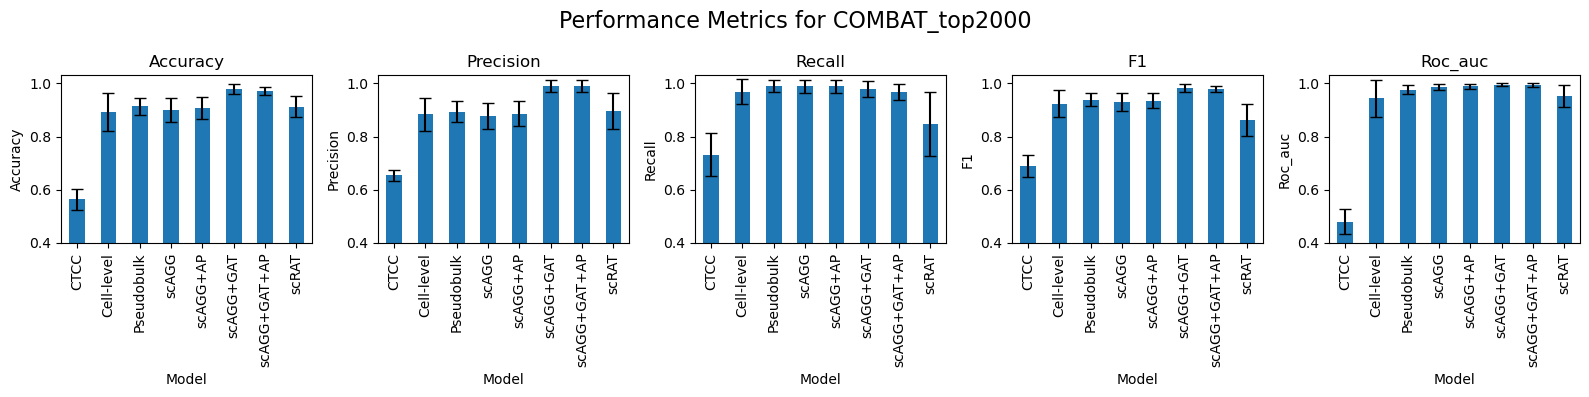

In [6]:
import matplotlib.pyplot as plt

# Parse the performance data
df = parse_performance_json(EXPERIMENT)

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
fig, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=False)

for i, metric in enumerate(metrics):
    avg = df.groupby("model")[metric].mean()
    std = df.groupby("model")[metric].std()
    avg.plot(
        kind="bar",
        yerr=std,
        ax=axes[i],
        title=metric.capitalize(),
        capsize=4,
        legend=False
    )
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")

    axes[i].set_ylim(0.4, 1.03)  # ???? For COMBAT maybe?

plt.suptitle(f"Performance Metrics for {EXPERIMENT}", fontsize=16)
plt.tight_layout()

plt.show()

Model: scAGG_rep1 -> 5 folds
Model: scAGG_rep2 -> 5 folds
Model: scAGG_rep3 -> 5 folds
Model: scAGG_rep4 -> 5 folds
Model: scAGG_rep5 -> 5 folds
Model: scAGG_split42 -> 5 folds
Model: scAGG_split43 -> 5 folds
Model: scAGG_split44 -> 5 folds
Model: scAGG_split45 -> 5 folds
Model: scAGG_split46 -> 5 folds


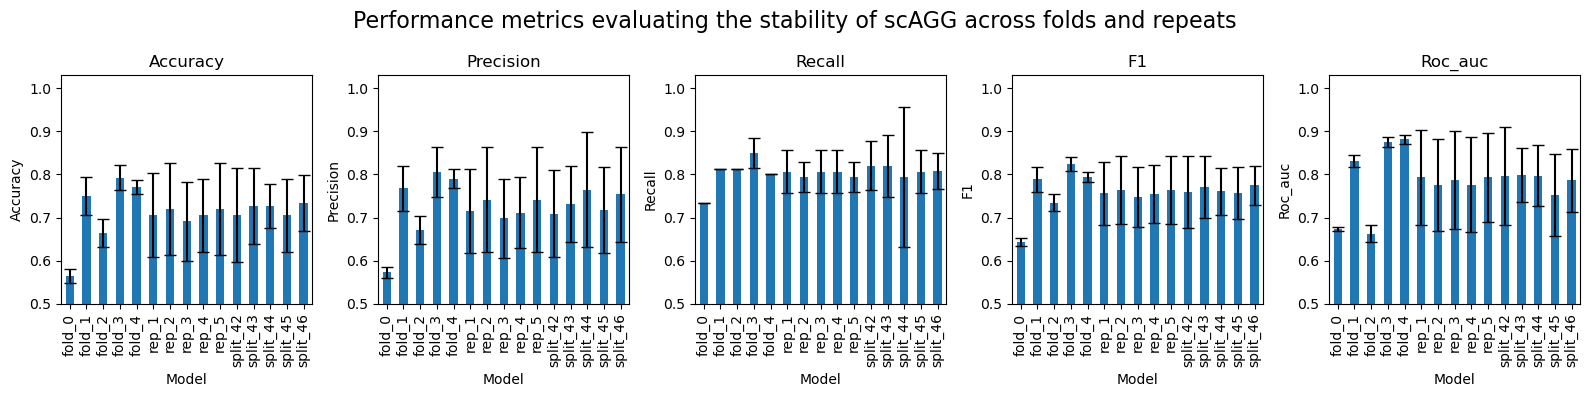

In [7]:
df = parse_performance_json("stability")

# also duplicate the rows with "rep" in the name, and swap model and fold columns (so we average over reps for each fold)

df_add = df[df["model"].str.contains("rep")].copy()
folds = df_add["fold"]
reps = df_add["model"].str.replace("scAGG_rep", "", regex=False).astype(int)
df_add["fold"] = reps
df_add["model"] = folds

# prepend "fold" to the model name
df_add["model"] = "fold_" + df_add["model"].astype(str)

df = pd.concat([df, df_add], axis=0)
df["model"] = df["model"].str.replace("scAGG_", "", regex=False)
df["model"] = df["model"].str.replace("rep", "rep_", regex=False)
df["model"] = df["model"].str.replace("split", "split_", regex=False)


metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
fig, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=False)

for i, metric in enumerate(metrics):
    avg = df.groupby("model")[metric].mean()
    std = df.groupby("model")[metric].std()
    avg.plot(
        kind="bar",
        yerr=std,
        ax=axes[i],
        title=metric.capitalize(),
        capsize=4,
        legend=False
    )
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")
    axes[i].set_ylim(0.5, 1.03)  # ???? For COMBAT maybe?

plt.suptitle(f"Performance metrics evaluating the stability of scAGG across folds and repeats", fontsize=16)
plt.tight_layout()
plt.show()


Model: Mathys -> 5 folds
Model: 1k_HVG -> 5 folds


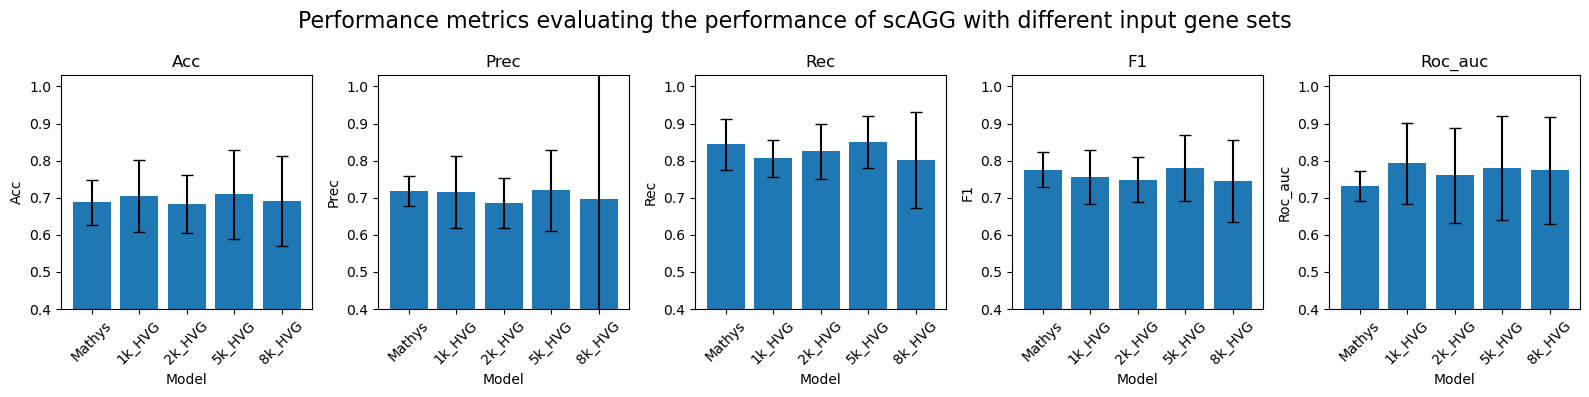

In [8]:
df = parse_performance_json("gene_set")

import matplotlib.pyplot as plt

# Models to plot
models = ["Mathys", "1k_HVG"]

# Metrics to plot
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Prepare mean and std for gene sets
gene_sets = {
    "2k_HVG": results_2k.loc[results_2k["Model"] == "scAGG"],
    "5k_HVG": results_5k.loc[results_5k["Model"] == "scAGG"],
    "8k_HVG": results_8k.loc[results_8k["Model"] == "scAGG"],
}

fig, axes = plt.subplots(1, len(metrics), figsize=(16, 4), sharey=False)

for i, metric in enumerate(metrics):
    # Collect means and stds for Mathys and 1k_HVG
    means = []
    stds = []
    labels = []
    for model in models:
        m = df[df["model"] == model][metric].mean()
        s = df[df["model"] == model][metric].std()
        means.append(m)
        stds.append(s)
        labels.append(model)
    # Add gene sets

    metric = metric.replace("accuracy", "Acc")
    metric = metric.replace("precision", "Prec")
    metric = metric.replace("recall", "Rec")
    
    for gs, gs_df in gene_sets.items():
        means.append(gs_df[metric.capitalize() if metric != "roc_auc" else "AUC"].values[0])
        stds.append(gs_df[metric.capitalize() + "_std" if metric != "roc_auc" else "AUC_std"].values[0])
        labels.append(gs)

    axes[i].bar(labels, means, yerr=stds, capsize=4)
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")
    axes[i].set_ylim(0.4, 1.03)
    # rotate x-ticks for better readability
    axes[i].tick_params(axis='x', rotation=45)
    

plt.suptitle("Performance metrics evaluating the performance of scAGG with different input gene sets", fontsize=16)
plt.tight_layout()
plt.show()
